In [177]:
##Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df=pd.read_csv('BankNote_Authentication.csv')

In [180]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [181]:
df.corr()['class']

variance   -0.724843
skewness   -0.444688
curtosis    0.155883
entropy    -0.023424
class       1.000000
Name: class, dtype: float64

<AxesSubplot:xlabel='variance', ylabel='skewness'>

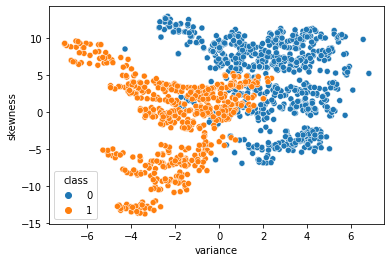

In [182]:
sns.scatterplot(x='variance',y='skewness',hue='class',data=df)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [184]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X=df.drop('class',axis=1)
y=df['class']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report

In [189]:
models=[('RF',RandomForestClassifier()),
        ('KM',KMeans(n_clusters=2)),
        ('LR',LogisticRegression()),
        ('SVC',SVC())
        ]

In [190]:
dict={}
for name,model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    dict[name]=accuracy_score(y_test,pred)
    

In [191]:
dict

{'RF': 0.9902912621359223,
 'KM': 0.633495145631068,
 'LR': 0.9878640776699029,
 'SVC': 0.9975728155339806}

In [192]:
model=SVC().fit(X_train,y_train)

In [193]:
import pickle

pickle.dump(model,open('model.pkl','wb'))